<a href="https://colab.research.google.com/github/larigioad/projetos-soulcode/blob/main/AD1_deputados_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pymongo
from pymongo import MongoClient

In [ ]:
uri = "mongodb+srv://larigioad.xj2ckxw.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = MongoClient(uri,
                     tls=True,
                     tlsCertificateKeyFile='/content/X509-cert-1801012685387590698.pem',
                     )


db = client['brutos']
collection = db['depsp_bruto']

In [ ]:
pip install gcsfs

In [ ]:
import pandas as pd
import os
import numpy as np
from google.cloud import storage

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/igorgondimfreebuck/depsp.csv', sep=',') 

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df

,Ano,Matricula,Mes,Valor,CNPJ,Deputado,Tipo,Fornecedor
0,2015,300257,3,200.00,71806251000106,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,AUTO POSTO DE SERVIÇOS MARV LTDA
1,2015,300257,3,295.40,68064740000125,ABELARDO CAMARINHA,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,PAPER FACE COMERCIAL LTDA
2,2015,300257,3,2850.00,22145388877,ABELARDO CAMARINHA,N - MORADIA,LARA SERVINO VARGAS ABREU
3,2015,300257,4,100.00,10915883000113,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,CENTRO AUTOMOTIVO TOP 23 LTDA
4,2015,300257,4,195.01,71806251000106,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,AUTO POSTO DE SERVIÇOS MARV LTDA
...,...,...,...,...,...,...,...,...
542390,2007,300441,3,120.00,6306675000140.0,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",OPTEI EXPRESS LTDA.
542391,2007,300441,3,2096.80,52204617000122.0,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",CHURRASCARIA JANDA LTDA.
542392,2007,300441,3,13.48,62925474000282.0,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",ASSOCIAÇÃO FUNC.ASSEMB.LEG. EST.SÃO PAULO
542393,2007,300441,3,38.08,66747577000170.0,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",IBIZA EUROPEIA ALIMENTOS LTDA


In [ ]:
df.dtypes

Ano             int64
Matricula       int64
Mes             int64
Valor         float64
CNPJ           object
Deputado       object
Tipo           object
Fornecedor     object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542395 entries, 0 to 542394
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Ano         542395 non-null  int64  
 1   Matricula   542395 non-null  int64  
 2   Mes         542395 non-null  int64  
 3   Valor       542395 non-null  float64
 4   CNPJ        531428 non-null  object 
 5   Deputado    542395 non-null  object 
 6   Tipo        542395 non-null  object 
 7   Fornecedor  542395 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 33.1+ MB


In [ ]:
sorted(pd.unique(df['Ano']))

In [ ]:
# CRIANDO UM BACKUP:
dfback = df.copy()

In [ ]:
# QUANTIDADE DE VALORES NULOS:
df.isna().sum()

Ano               0
Matricula         0
Mes               0
Valor             0
CNPJ          10967
Deputado          0
Tipo              0
Fornecedor        0
dtype: int64

In [ ]:
df.count()

Ano           542395
Matricula     542395
Mes           542395
Valor         542395
CNPJ          531428
Deputado      542395
Tipo          542395
Fornecedor    542395
dtype: int64

In [ ]:
df.CNPJ = df.CNPJ.replace('O','0')

In [ ]:
# Checando se existem inconsistências nos fornecedores:
df.groupby('Fornecedor').size().sort_values(ascending=False).head(100).index

Index(['PEDÁGIO', 'TAXI', 'TELEFONICA BRASIL S.A.', 'CLARO S/A',
       'TELEFONICA BRASIL S.A', 'NEXTEL TELECOMUNICAÇÕES LTDA', 'VIVO',
       'SABESP', 'VIVO S.A.', 'TELEFÔNICA BRASIL S.A.', 'TELEFONICA',
       'COMPANHIA PAULISTA DE FORÇA E LUZ', 'TELEFONICA BRASIL S/A',
       'WAGNER HUBERT EPP', 'TELESP CELULAR S/A',
       'UNIDAS VEÍCULOS ESPECIAIS S.A.', 'TELEFONICA BRASIL SA',
       'NET SERVIÇOS DE COMUNICAÇÃO S/A', 'CLARO S.A.',
       'ELETROPAULO METROPOLITANA ELETRICIDADE DE SÃO PAULO S.A.',
       'TERRA NETWORKS BRASIL S/A', 'UOL',
       'COMPANHIA PIRATININGA DE FORÇA E LUZ',
       'CIA BRASILEIRA DE DISTRIBUIÇÃO', 'ELETROPAULO',
       'ECT - EMP. BRAS. DE CORREIOS E TELEGRAFOS',
       'COMERCIAL FRANGO ASSADO LTDA', 'CLARO S.A',
       'NEXTEL TELECOMUNICAÇÕES LTDA.', 'EMBRATEL', 'NET',
       'TELEFÔNICA BRASIL S.A', 'KALUNGA COM. E IND. GRÁFICA LTDA.',
       'POSTO BRIGADEIRO LTDA', 'INSTITUTO MENSAGEIROS',
       'GABRIEL ALFIO TOMASELLI', 'CPFL ENERGIA', '

In [ ]:
correcoes = { 
    'VIVO':'VIVO S.A.', 
    'TELEFONICA BRASIL S.A':'TELEFONICA BRASIL S.A.', 
    'NEXTEL TELECOMUNICAÇÕES LTDA':'NEXTEL TELECOMUNICAÇÕES LTDA.', 
    'SABESP':'COMPANHIA DE SANEAMENTO BÁSICO DO ESTADO DE SÃO PAULO - SABESP',
    'TELEFÔNICA BRASIL S.A.':'TELEFONICA BRASIL S.A.',
    'TELEFONICA': 'TELEFONICA BRASIL S.A.',
    'COMPANHIA PAULISTA DE FORÇA E LUZ':'CPFL ENERGIA', 
    'TELEFONICA BRASIL S/A':'TELEFONICA BRASIL S.A.',
    'TELEFONICA BRASIL SA':'TELEFONICA BRASIL S.A.',
    'CLARO S.A.':'CLARO S/A',
    'ELETROPAULO METROPOLITANA ELETRICIDADE DE SÃO PAULO S.A.':'ELETROPAULO',
    'ELETROPAULO':'AES ELETROPAULO',
    'CLARO S.A':'CLARO S/A',
    'NEXTEL TELECOMUNICAÇÕES LTDA.':'NEXTEL TELECOMUNICAÇÕES LTDA', 
    'NET':'NET SERVIÇOS DE COMUNICAÇÃO S/A',
    'TELEFÔNICA BRASIL S.A':'TELEFONICA BRASIL S.A.',  
    'KALUNGA':'KALUNGA COM. E IND. GRÁFICA LTDA.',
    'KALUNGA COMERCIO E IND. GRAFICA LTDA':'KALUNGA COM. E IND. GRÁFICA LTDA.',
    'NEXTEL':'NEXTEL TELECOMUNICAÇÕES LTDA',
    'KALUNGA COM. E IND. GRAFICA LTDA':'KALUNGA COM. E IND. GRÁFICA LTDA.', 
    'TELEFÔNICA BRASIL S/A':'TELEFONICA BRASIL S.A.',
    'TELESP CELULAR':'TELESP CELULAR S/A'
}
  
for key, value in correcoes.items():
  df.loc[df.Fornecedor==key,'Fornecedor'] = value

In [ ]:
# DEPUTADOS QUE MAIS GASTARAM:
df.groupby('Deputado')['Valor'].sum().sort_values(ascending=False).head(3)

Deputado
CAMPOS MACHADO       5691197.91
ENIO TATTO           5363451.90
MARIA LÚCIA AMARY    5297913.91
Name: Valor, dtype: float64

<AxesSubplot:xlabel='Nome do deputado', ylabel='Valor gasto'>

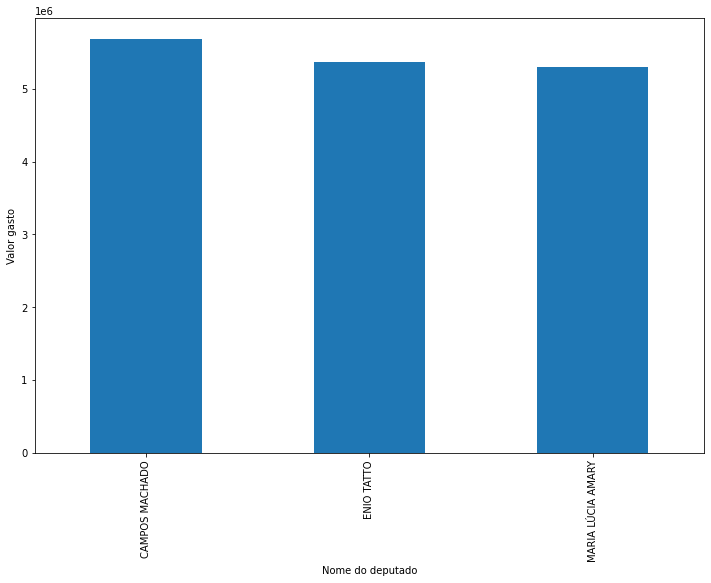

In [ ]:
# DEMONSTRAÇÃO VISUAL DOS DEPUTADOS QUE MAIS GASTARAM:
df.groupby('Deputado')['Valor'].sum().sort_values(ascending=False).head(3).plot.bar(figsize=(12,8), xlabel = 'Nome do deputado', ylabel= 'Valor gasto')

In [ ]:
# DEPUTADOS QUE MENOS GASTARAM:
df.groupby('Deputado')['Valor'].sum().sort_values().head(3)

Deputado
ANTÔNIO AGUIMARÃES DE CALDAS    2225.63
MAJOR MAURO                     2311.53
ULISSES SALES                   2653.53
Name: Valor, dtype: float64

<AxesSubplot:xlabel='Nome do deputado', ylabel='Valor gasto'>

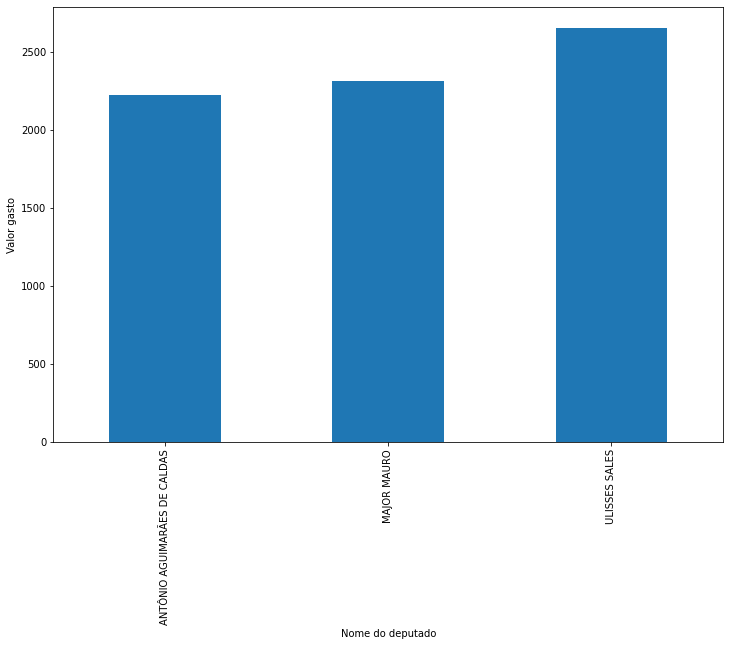

In [ ]:
# DEMONSTRAÇÃO VISUAL DOS DEPUTADOS QUE MENOS GASTARAM:
df.groupby('Deputado')['Valor'].sum().sort_values().head(3).plot.bar(figsize=(12,8), xlabel = 'Nome do deputado', ylabel= 'Valor gasto')

In [ ]:
# Criando um df para o deputado que mais gastou e o deputado que menos gastou para comparação:
filtrocampos = df.Deputado.isin(['CAMPOS MACHADO'])
dfcampos = df.loc[filtrocampos] 
filtroantonio = df.Deputado.isin(['ANTÔNIO AGUIMARÃES DE CALDAS'])
dfantonio = df.loc[filtroantonio]

In [ ]:
# Checando os anos que o deputado que mais gastou possui registros e conclui-se que ele possui registro em todos os anos de 2002 a 2023.
sorted(pd.unique(dfcampos['Ano']))

[2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023]

In [ ]:
# Enquanto o que menos gastou possui registros apenas no ano de 2011.
sorted(pd.unique(dfantonio['Ano']))

[2011]

In [ ]:
sorted(pd.unique(df['Deputado']))

['ABELARDO CAMARINHA',
 'ADALBERTO FREITAS',
 'ADILSON BARROSO',
 'ADILSON ROSSI',
 'ADRIANA BORGO',
 'ADRIANO DIOGO',
 'AFANÁSIO JAZADJI',
 'AFONSO LOBATO',
 'AGENTE FEDERAL DANILO BALAS',
 'AIRTON GARCIA',
 'ALBERTO CALVO',
 'ALBERTO TURCO LOCO HIAR',
 'ALCIDES AMAZONAS',
 'ALDO DEMARCHI',
 'ALENCAR SANTANA BRAGA',
 'ALESSANDRA MONTEIRO',
 'ALEX MADUREIRA',
 'ALEX MANENTE',
 'ALEXANDRE DA FARMÁCIA',
 'ALEXANDRE PEREIRA',
 'ALFREDO RUZZA',
 'ALOÍSIO VIEIRA',
 'ALTAIR MORAES',
 'ANA DO CARMO',
 'ANA MARTINS',
 'ANA PERUGINI',
 'ANALICE FERNANDES',
 'ANDRÉ DO PRADO',
 'ANDRÉ SOARES',
 'ANGELO PERUGINI',
 'ANTONIO CARLOS JUNIOR',
 'ANTONIO MENTOR',
 'ANTONIO SALIM CURIATI',
 'ANTÔNIO AGUIMARÃES DE CALDAS',
 'ANTÔNIO CARLOS',
 'APRIGIO',
 'ARNALDO JARDIM',
 'ARTHUR ALVES PINTO',
 'ARY FOSSEN',
 'ATAIDE TERUEL',
 'ATILA JACOMUSSI',
 'BALEIA ROSSI',
 'BARROS MUNHOZ',
 'BETH SAHÃO',
 'BETO TRÍCOLI',
 'BRUNO COVAS',
 'BRUNO FEDER',
 'BRUNO GANEM',
 'CAIO FRANÇA',
 'CALDINI CRESPO',
 'CAMILO G

In [ ]:
# CÓDIGO PARA CONSULTAR INDIVIDUALMENTE QUANTO CADA DEPUTADO GASTOU NO TOTAL EM TODO O PERÍODO:
ftgastodeputado = df.Deputado == 'UBIRATAN GUIMARÃES'
df.loc[ftgastodeputado].groupby(['Deputado'])['Valor'].sum().sort_values(ascending=False)

Deputado
UBIRATAN GUIMARÃES    667711.36
Name: Valor, dtype: float64

In [ ]:
filtroano = df.Ano>2018
dfano = df.loc[filtroano]

In [ ]:
# ITENS ONDE MAIS TIVERAM DESPESAS NOS ÚLTIMOS 4 ANOS:
dfano.groupby('Tipo')['Valor'].sum().sort_values(ascending=False)

Tipo
L - LOCAÇÃO DE BENS IMÓVEIS                                           16086832.19
D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS  E REPRODUÇÃO DE DOCS    12607446.44
O - LOCAÇÃO DE VEÍCULO                                                11693211.97
F - SERVIÇOS TÉCNICOS PROFISSIONAIS (CONSULTORIA, PESQUISAS ETC)       8585146.23
K - LOCAÇÃO DE BENS MÓVEIS                                             7610491.39
A - COMBUSTÍVEIS E LUBRIFICANTES                                       6397869.93
M - MANUTENÇÃO DE BENS MÓVEIS,  IMÓVEIS, CONDOMÍNIOS E OUTROS          4270934.84
H - SERV.UTIL.PÚBLICA (TELEF.MÓVEL/FIXA, ENERGIA, ÁGUA, GÁS ETC)       3911704.93
E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS DE CONSUMO              3907922.43
I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCOMOÇÃO                    2967481.65
J - SERVIÇOS DE COMUNICAÇÃO                                            2675562.86
N - MORADIA                                                            2262343.44
P - DIVULGA

In [ ]:
# DEPUTADOS QUE MAIS GASTARAM NOS ULTIMOS 4 ANOS
dfano.groupby('Deputado')['Valor'].sum().sort_values(ascending=False)

Deputado
VINÍCIUS CAMARINHA       1580469.72
ENIO TATTO               1577070.41
TEONILIO BARBA           1568033.24
MARTA COSTA              1522020.23
PAULO FIORILO            1467310.33
                            ...    
ANTONIO SALIM CURIATI       2418.90
MAJOR MAURO                 2311.53
LUIZ GONZAGA VIEIRA         2251.96
CARLOS BEZERRA JR.          1467.37
PEDRO KAKÁ                  1302.67
Name: Valor, Length: 151, dtype: float64

<AxesSubplot:xlabel='Ano', ylabel='Valores\xa0gastos'>

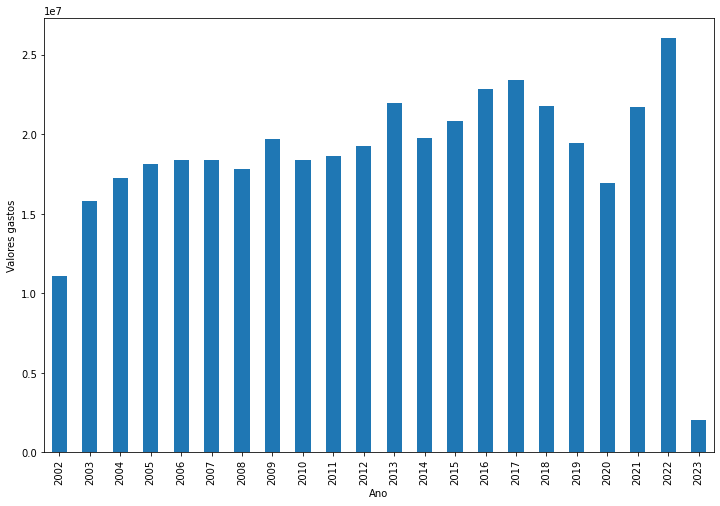

In [ ]:
# VALORES GASTOS A CADA ANO DE 2002 A 2023:
df.groupby('Ano')['Valor'].sum().plot.bar(figsize=(12,8),xlabel='Ano',ylabel='Valores gastos')

In [ ]:
db = client['tratados']
collectiondepsp = db['depsp_tratado']
collectiondepsp.count_documents({})

0

In [ ]:
df_dict = df.to_dict("records")

collectiondepsp.insert_many(df_dict)

In [ ]:
df.groupby('Fornecedor').size().sort_values(ascending=False).head(100).index